Installing libraries

In [ ]:
pip install causalml

In [ ]:
pip install duecredit

Imports

In [ ]:
# pip list
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
# from causalml.inference.meta import XGBTRegressor
from sklearn import preprocessing

Dataset import & EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load and read the file
df = pd.read_csv("/content/drive/My Drive/Research Internship/dataset/RTA Dataset.csv")

In [ ]:
df.head();

In [ ]:
#checking data types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
# Distribution of Accident severity
print(df['Accident_severity'].value_counts())

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64


In [ ]:
# Find columns with null percentage greater than 80%
null_percentage_threshold = 20
high_null_columns = df.columns[df.isnull().mean() * 100 > null_percentage_threshold]

print("\nColumns with null percentage greater than 80%:")
print(high_null_columns)

# Remove columns with null percentage greater than 80%
df = df.drop(columns=high_null_columns)

print("\n",df.shape)


Columns with null percentage greater than 80%:
Index(['Service_year_of_vehicle', 'Defect_of_vehicle', 'Work_of_casuality',
       'Fitness_of_casuality'],
      dtype='object')

 (12316, 28)


In [ ]:
# Drop
df.drop(columns = [
    'Owner_of_vehicle',
    'Number_of_casualties',
], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Area_accident_occured        12077 non-null  object
 9   Lanes_or_Medians             11931 non-null  object
 10  Road_allignment              12174 non-null  object
 11  Types_of_Junction            11429 non-null  object
 12  Road_surface_type            12144 non-null  object
 13  Road_surface_conditions      12

In [ ]:
# Removing rows with null values
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(12316, 26)
(8664, 26)


In [ ]:
# Encoding categorical data
categorical_columns = df.select_dtypes(include=['object','bool']).columns
categorical_columns


Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [ ]:
label_encoders = {}

# Encoding categorical columns
for col in categorical_columns:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
1,407,1,1,1,4,0,3,11,6,4,...,8,2,2,3,2,5,3,5,16,2
3,575,3,0,1,4,0,2,11,6,6,...,8,2,2,2,0,0,2,5,1,2
7,425,0,0,1,4,0,1,0,9,6,...,8,2,10,3,2,5,3,5,12,2
8,425,0,0,1,4,0,3,5,4,6,...,3,2,2,2,1,4,2,0,1,2
9,425,0,0,1,4,0,0,0,9,4,...,3,2,10,1,1,0,2,5,9,1


Train-test and treatment split for each feature


In [ ]:
features = df.columns
features

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved', 'Vehicle_movement',
       'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty',
       'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity'],
      dtype='object')

In [ ]:
# Estimate treatment effects using Causal ML
from causalml.inference.tree import UpliftTreeClassifier

In [ ]:
# Initialize UpliftTreeClassifier
uplift_model = UpliftTreeClassifier(control_name='control', max_depth=3, min_samples_leaf=100, min_samples_treatment=10, n_reg=100)

In [ ]:
def callITEScore(feature_name):

  # Split the data into training and testing sets
  X = df.drop(columns=['Accident_severity'])  # Features
  treatment = df[feature_name] # define your treatment column here
  y = df['Accident_severity']  # Target variable

  X_train, X_test, treatment_train, treatment_test, y_train, y_test = train_test_split(
      X, treatment, y, test_size=0.2, random_state=42
  )

  #  Convert treatment_train to string
  treatment_train_str = treatment_train.astype(str)

  # Fit the model
  uplift_model.fit(X_train, treatment_train_str, y_train)

  # Predict treatment effects on the test set
  # Calculate Individual Treatment Effects (ITE)
  ite = uplift_model.predict(X_test.values)

  return ite

In [ ]:
for f in features:
  print("Feature: " + f)
  print(df[f].value_counts())


Feature: Time
323    77
415    77
463    76
405    75
348    73
       ..
853     1
316     1
767     1
742     1
736     1
Name: Time, Length: 1033, dtype: int64
Feature: Day_of_week
0    1423
4    1292
6    1287
5    1267
2    1201
1    1183
3    1011
Name: Day_of_week, dtype: int64
Feature: Age_band_of_driver
0    2952
1    2875
4    1143
2    1094
3     600
Name: Age_band_of_driver, dtype: int64
Feature: Sex_of_driver
1    8064
0     475
2     125
Name: Sex_of_driver, dtype: int64
Feature: Educational_level
4    5710
1    1598
2     848
0     281
6     133
5      61
3      33
Name: Educational_level, dtype: int64
Feature: Vehicle_driver_relation
0    7227
2    1351
1      84
3       2
Name: Vehicle_driver_relation, dtype: int64
Feature: Driving_experience
2    2485
1    2013
3    1735
0    1332
4     995
5      88
6      16
Name: Driving_experience, dtype: int64
Feature: Type_of_vehicle
0     2436
5     1658
7      916
8      633
9      551
14     507
10     421
4      407
11     3

In [ ]:
considered_features = []

for f in features:
  if(df[f].unique().size <= 15 and f != 'Accident_severity'):
    considered_features.append(f)

considered_features

['Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Number_of_vehicles_involved',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Pedestrian_movement']

Generating ATE Score for all features

The Average Treatment Effect (ATE) and Individual Treatment Effects (ITE) are both measures used in causal inference to understand the effect of a treatment or intervention on an outcome variable. However, they differ in terms of the level of analysis and interpretation:

1. **Average Treatment Effect (ATE)**:
   - ATE represents the average causal effect of a treatment or intervention on an outcome variable across the entire population or sample.
   - It provides a summary measure of the treatment effect, averaging over all individuals in the population or sample.
   - ATE is typically estimated using statistical methods such as propensity score matching, instrumental variables, or regression adjustment.
   - ATE is expressed as a single value or estimate that quantifies the average impact of the treatment on the outcome variable.
   - ATE is useful for understanding the overall effectiveness of a treatment across a population or sample.

2. **Individual Treatment Effects (ITE)**:
   - ITE represents the causal effect of a treatment or intervention on an outcome variable for each individual unit or observation in the population or sample.
   - It provides a personalized measure of the treatment effect, allowing for heterogeneity in treatment effects across different individuals.
   - ITE is estimated by modeling the treatment effect for each individual separately, often using machine learning methods such as uplift modeling or individualized treatment effect estimation.
   - ITE is expressed as a vector or array of values, with each value representing the treatment effect for a specific individual.
   - ITE is useful for understanding the variability in treatment effects across different individuals and for tailoring treatments to individual characteristics.

In summary, while ATE provides a summary measure of the average treatment effect across a population, ITE provides personalized estimates of the treatment effect for each individual unit. Both measures are important for understanding the overall impact of a treatment as well as the variability in treatment effects across different subgroups or individuals.

In [ ]:
from tabulate import tabulate

table_data = []
print("Average Treatment Effect (ATE) for Considered Features :\n");

for f in considered_features:
  ite = callITEScore(f)

  # Calculate Average Treatment Effect (ATE)
  ate = ite.mean()

  table_data.append([f, ate])

# Print the table using tabulate
print(tabulate(table_data, headers=["Feature", "ATE"]))

Average Treatment Effect (ATE) for Considered Features :

Feature                           ATE
---------------------------  --------
Day_of_week                  0.864212
Age_band_of_driver           0.823707
Sex_of_driver                0.745574
Educational_level            0.867068
Vehicle_driver_relation      0.791636
Driving_experience           0.868067
Area_accident_occured        0.914981
Lanes_or_Medians             0.86671
Road_allignment              0.894179
Types_of_Junction            0.884675
Road_surface_type            0.824984
Road_surface_conditions      0.795527
Light_conditions             0.784809
Weather_conditions           0.897513
Type_of_collision            0.902282
Number_of_vehicles_involved  0.851645
Vehicle_movement             0.913676
Casualty_class               0.790189
Sex_of_casualty              0.741538
Age_band_of_casualty         0.847077
Casualty_severity            0.792053
Pedestrian_movement          0.890837


**INFERENCE**

 The ATE indicates the average difference in the outcome variable (in this case, 'Accident_severity') between the treated group (individuals with a particular feature) and the control group (individuals without that particular feature). Here's what it tells us:

1. ATE values closer to 1 indicate that having the feature is associated with a higher 'Accident_severity' on average compared to not having the feature.
2. ATE values closer to 0 indicate that having the feature is not strongly associated with a difference in 'Accident_severity' compared to not having the feature.
3. ATE values closer to -1 indicate that having the feature is associated with a lower 'Accident_severity' on average compared to not having the feature.

***For example:***

1. ATE for 'Day_of_week' is 0.8642, suggesting that accidents occurring on certain days of the week are associated with higher severity compared to accidents occurring on other days.
2. ATE for 'Sex_of_driver' is 0.7456, suggesting that the gender of the driver has an impact on the severity of accidents, with certain genders being associated with higher severity accidents on average.
3. ATE for 'Weather_conditions' is 0.8975, indicating that certain weather conditions are associated with higher severity accidents compared to other weather conditions.

Overall, analyzing the ATE for each feature helps identify which factors or characteristics are associated with higher or lower accident severity in your dataset, providing insights for potential interventions or preventive measures.

In [ ]:
def showITEStats(considered_feature_name, is_cat):
  ite = callITEScore(considered_feature_name)
  feature_value = []

  if(is_cat):
    # Retrieve the LabelEncoder for 'Road_surface_conditions'
    le_road_surface_conditions = label_encoders[considered_feature_name]

    # Inverse transform numerical labels to get original categories
    original_categories = le_road_surface_conditions.inverse_transform(range(len(le_road_surface_conditions.classes_)))

    # Print the mapping of numerical values to treatment groups
    print("Treatment Groups:")
    for value, category in enumerate(original_categories):
        print(f" {value}: {category}")
        feature_value.append(value)

  else:
    feature_value = df[considered_feature_name].unique()


  print("\n-----------\nITE TABLE\n-----------")

  # considering the last extra column as "-1" / without treatment
  feature_value = np.insert(feature_value, 0, -1)

  # Create a DataFrame to store ITE values
  ite_df = pd.DataFrame(ite, columns=feature_value)

  # Print the ITE DataFrame
  print(ite_df.head(1))

1. The first column seems to indicate the predicted treatment effect for the control group.
2. The second column appears to represent the predicted treatment effect for the first treatment group.
3. The third column represents the predicted treatment effect for the second treatment group.
4. The fourth column represents the predicted treatment effect for the third treatment group.
5. The fifth column appears to represent the predicted treatment effect for another treatment group.

In [ ]:
def showITEStatsTable(considered_feature_name, is_cat):
  ite = callITEScore(considered_feature_name)
  ate = ite.mean()
  print("ATE: ", ate, "\n")

  feature_value = []

  if(is_cat):
    le_road_surface_conditions = label_encoders[considered_feature_name] # Retrieve the LabelEncoder for

    # Inverse transform numerical labels to get original categories
    original_categories = le_road_surface_conditions.inverse_transform(range(len(le_road_surface_conditions.classes_)))

    without_treatment = -1
    #Mapping of numerical values to treatment groups
    for value, category in enumerate(original_categories):
        feature_value.append(category)

  else:
    feature_value = df[considered_feature_name].unique()
    without_treatment = -1

  # considering the last extra column as "-1" / without treatment
  feature_value = np.insert(feature_value, 0, without_treatment)

  table_data = []
  for i in range(0, feature_value.size):
    table_data.append([feature_value[i] , ite[0][i]])

  # Sort the table_data based on the values in ite[0] in reverse order
  table_data = sorted(table_data, key=lambda x: x[1], reverse=True)

  # Print the table using tabulate
  print(tabulate(table_data, headers=["Feature Value", "ITE"]))

  return ate, table_data

In [ ]:
# to store final results
calculated_data = []

In [ ]:
# Find the encoded features
considered_categorical_values = np.intersect1d(considered_features, categorical_columns)

for f in considered_categorical_values:
  print("Feature: ", f,)
  ate, table_data = showITEStatsTable(f,True)
  calculated_data.append((f, ate, table_data))
  print("----------------------------------------------------------------------------------------------------------------------------------------")

Feature:  Age_band_of_casualty
ATE:  0.8470770039761829 

Feature Value         ITE
---------------  --------
Under 18         0.991667
31-50            0.989316
Over 51          0.98917
na               0.988728
5                0.985507
18-30            0.985151
-1               0
----------------------------------------------------------------------------------------------------------------------------------------
Feature:  Age_band_of_driver
ATE:  0.8237072512086119 

Feature Value         ITE
---------------  --------
Unknown          0.995521
31-50            0.988798
Under 18         0.98768
18-30            0.986486
Over 51          0.983759
-1               0
----------------------------------------------------------------------------------------------------------------------------------------
Feature:  Area_accident_occured
ATE:  0.9149813663020121 

Feature Value                         ITE
-------------------------------  --------
Hospital areas                   1
Other   

In [ ]:
# Find the remaining features
considered_non_categorical_values = np.setdiff1d(considered_features, categorical_columns)

for f in considered_non_categorical_values:
  print("Feature: ", f)
  ate, table_data = showITEStatsTable(f,False)
  calculated_data.append((f, ate, table_data))
  print("----------------------------------------------------------------------------------------------------------------------------------------")


Feature:  Number_of_vehicles_involved
ATE:  0.8516450629838112 

  Feature Value       ITE
---------------  --------
              6  1
              4  1
              7  1
              3  0.993205
              1  0.988682
              2  0.979628
             -1  0
----------------------------------------------------------------------------------------------------------------------------------------


**Rows of ITE are same - reason by CHAT GPT**

If all the rows in your ITE array are exactly the same, it could indicate a few possibilities:

Uniform Treatment Effects: It's possible that the model is predicting the same treatment effect for all samples in your test set across all treatment groups. This could suggest that the treatment variable ("Road_surface_conditions") is not significantly influencing the predicted outcome (accident severity), at least based on the features included in your model.

Model or Data Issue: There might be an issue with the model training process or the data used for training and testing. It's essential to ensure that the model is trained properly and that the test set includes a diverse range of samples with varying treatment conditions.

Debugging: You may need to inspect your model training process, feature selection, and data preprocessing steps to identify any potential issues that could lead to identical predictions across all samples and treatment groups.

To further investigate this issue, you can:

Check the model's training process to ensure it's functioning as expected.
Review the feature importance to understand if the treatment variable is being properly considered.
Verify the data used for training and testing to ensure it accurately represents the real-world scenario.
Consider alternative modeling approaches or feature engineering techniques if necessary.

In [ ]:
# Export the final results as CSV

# Create a list to hold the transformed data
transformed_data = []

# Iterate through the original data and transform it
for i in range(len(considered_features)):
    feature = calculated_data[i][0]
    asp = calculated_data[i][1]
    isps = calculated_data[i][2]
    for isp_tuple in isps:
        key, value = isp_tuple
        transformed_data.append({'Name of Feature': feature if isp_tuple == isps[0] else '', 'ASP': asp if isp_tuple == isps[0] else '', 'ISP Key': key, 'ISP Value': value})

# Create the DataFrame from the transformed data
df = pd.DataFrame(transformed_data)

# Export DataFrame to CSV
df.to_csv('/content/drive/My Drive/XAI/causalml/results/table.csv', index=False)

print("DONE!")


DONE!


**VISUALIZATION**

In [ ]:
# Function to visualize ITE using bar plot

def visualizeITE(feature_name, ite_values):
    plt.figure(figsize=(8, 4))

    # Filter out the value ['-1', 0.0] if present
    ite_values_filtered = [item for item in ite_values if item[0] != '-1']

    x = [item[1] for item in ite_values_filtered]
    y = [item[0] for item in ite_values_filtered]

    plt.barh(y, x)
    plt.xlabel('Individual Treatment Effect (ITE)', fontsize=12, fontweight='bold', fontstyle='italic')
    plt.ylabel(feature_name, fontsize=12, fontweight='bold', fontstyle='italic')
    plt.title('Bar Plot: ITE for ' + feature_name, fontsize=14, fontweight='bold')

    # Calculate dynamic y-range based on ITE values
    min_ite = min(x)
    max_ite = max(x)
    range_padding = 0.05 * (max_ite - min_ite)
    custom_ylim = (min_ite - range_padding, max_ite + range_padding)
    plt.xlim(custom_ylim)

    plt.tight_layout()
    plt.show()

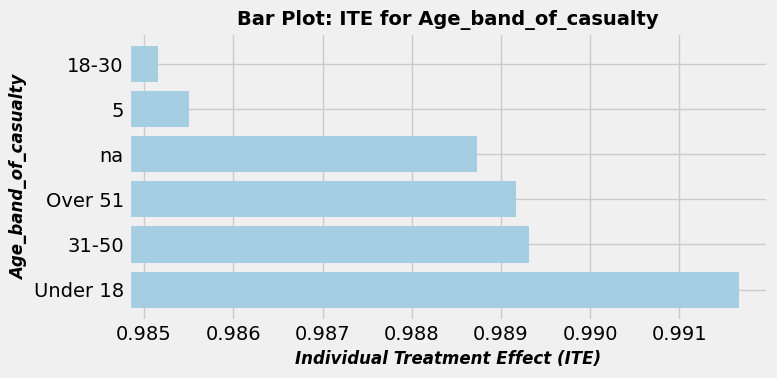

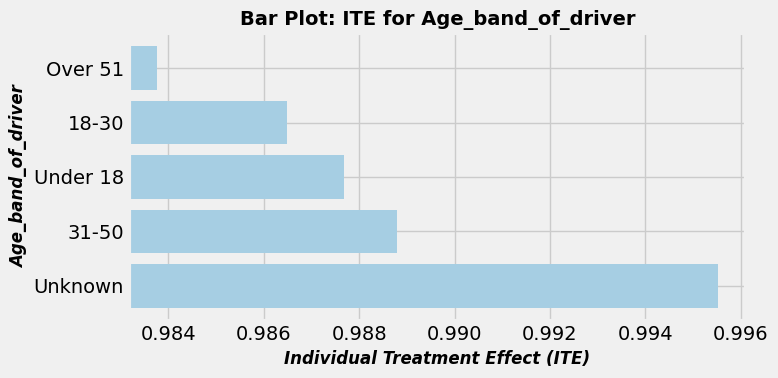

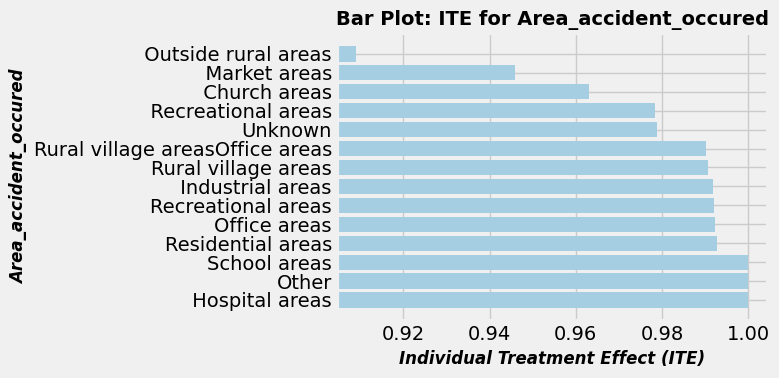

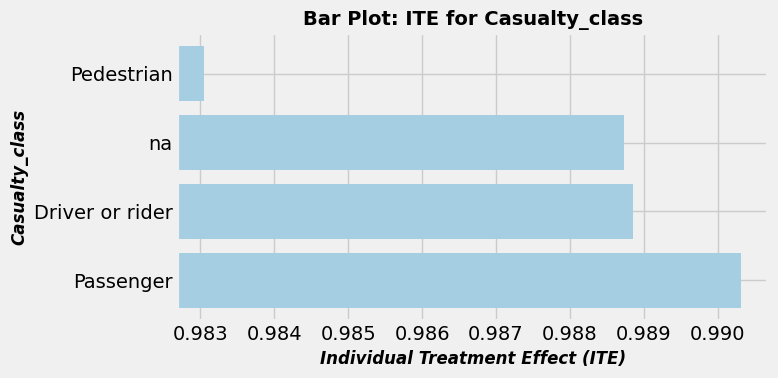

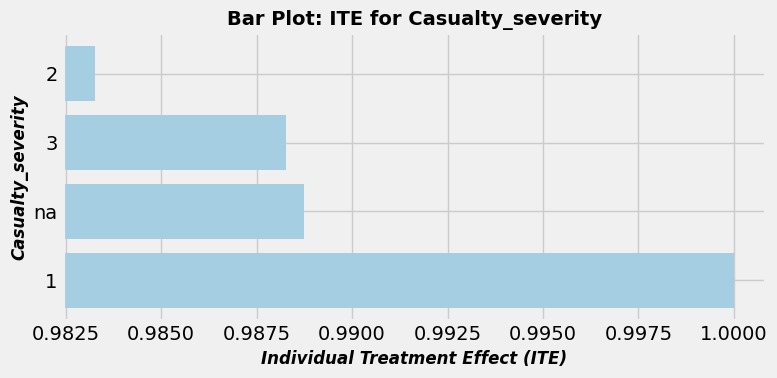

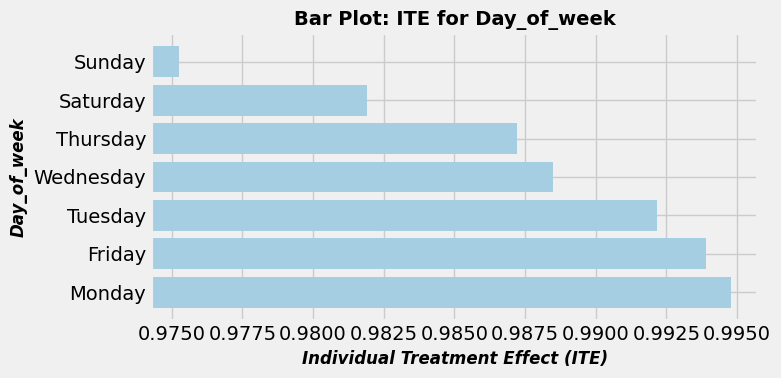

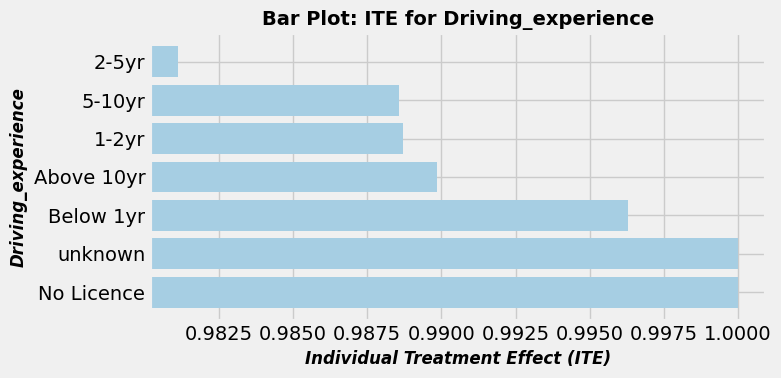

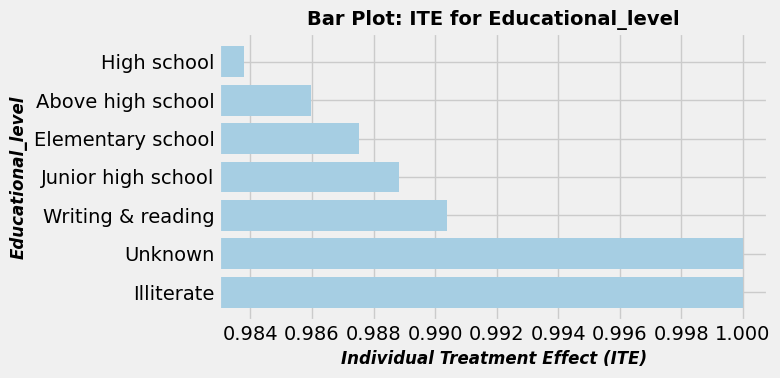

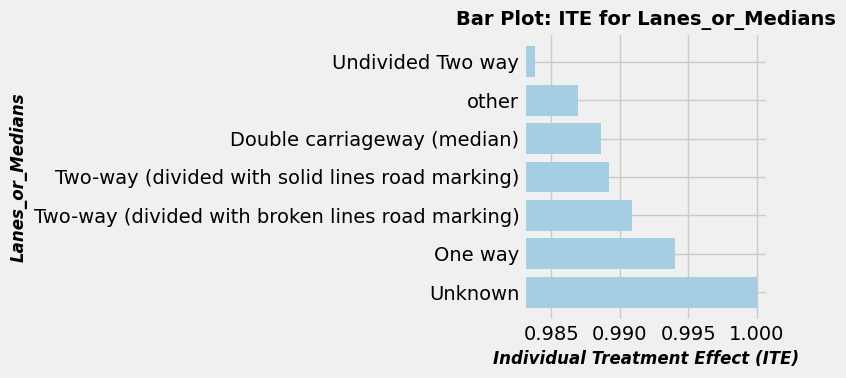

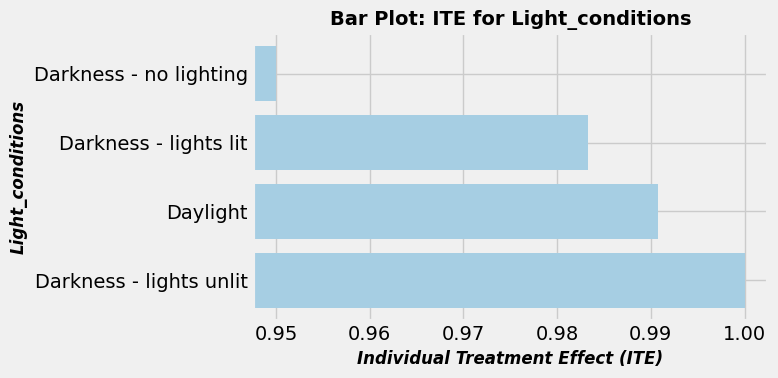

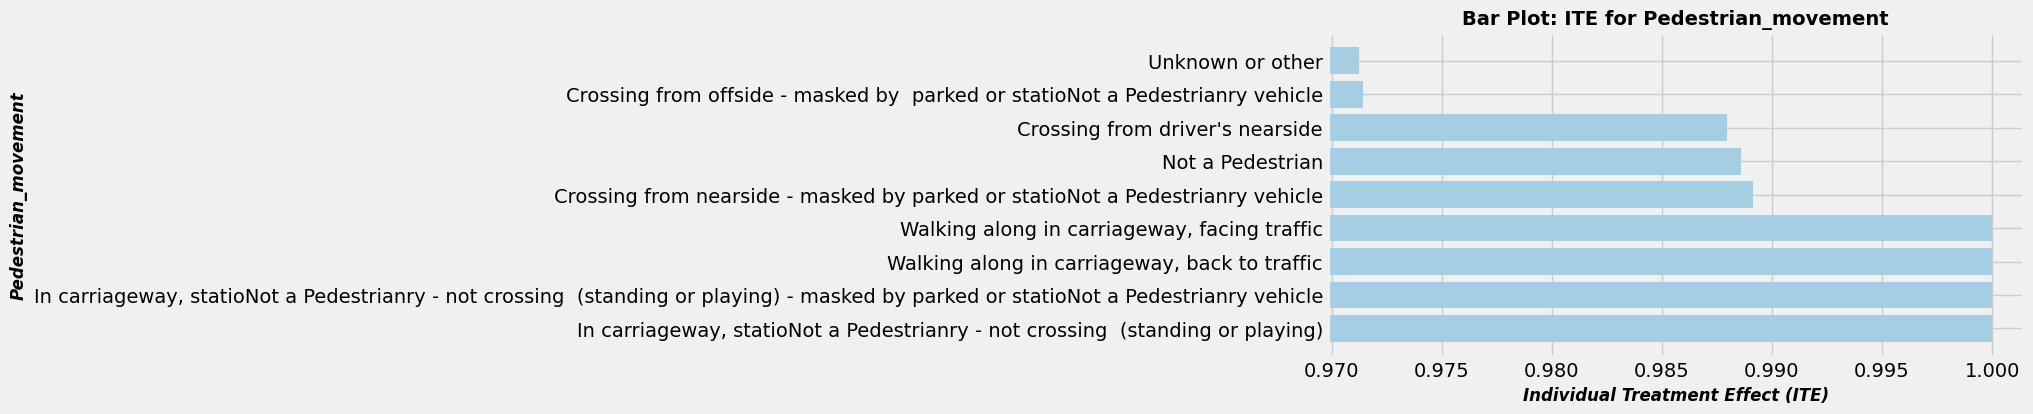

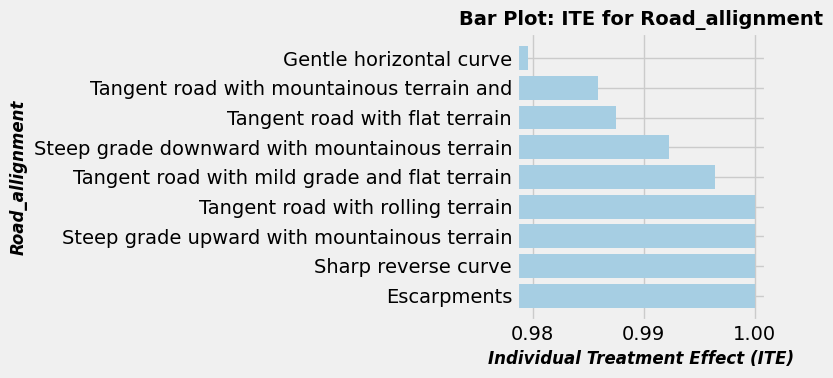

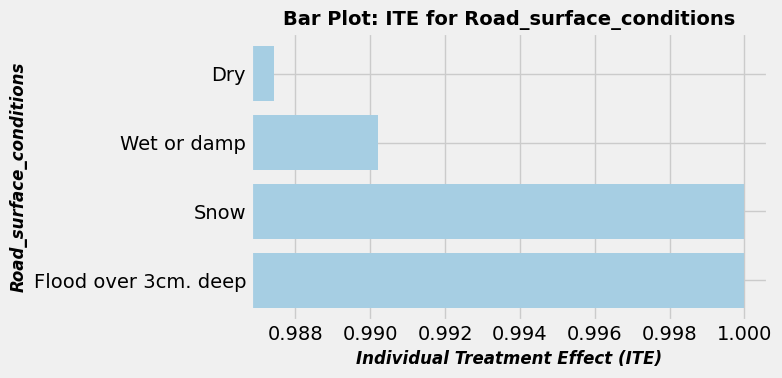

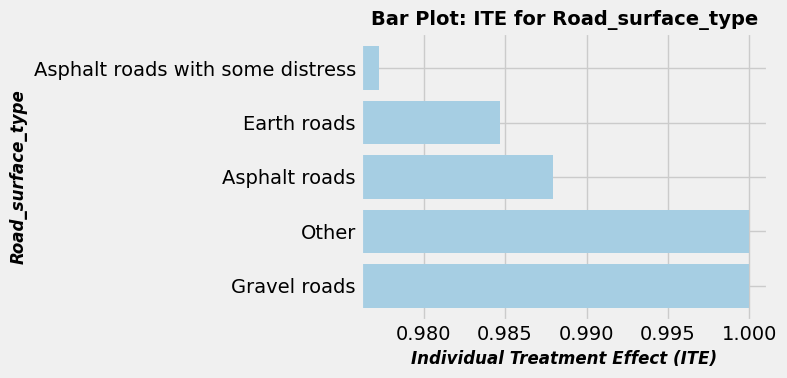

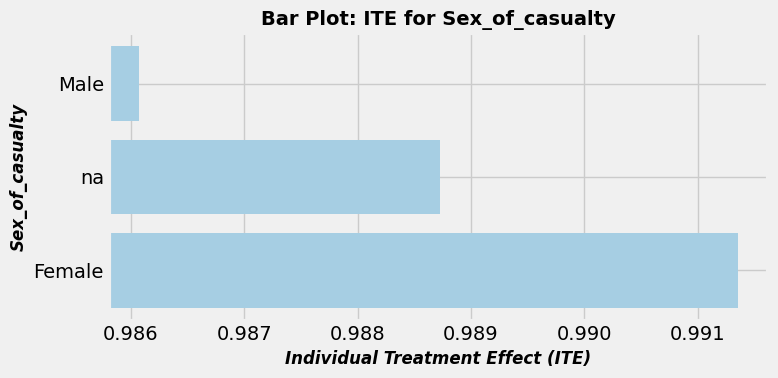

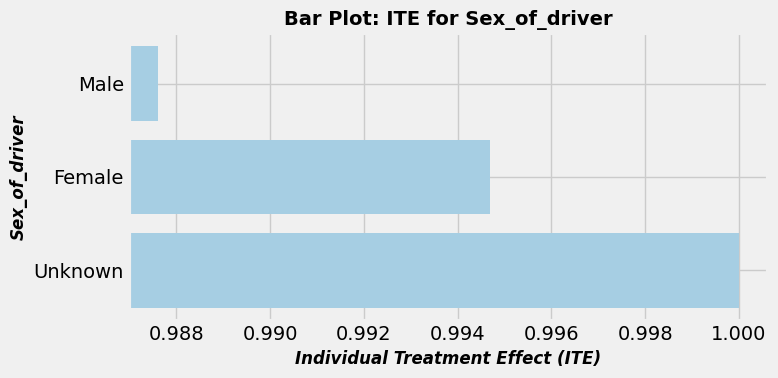

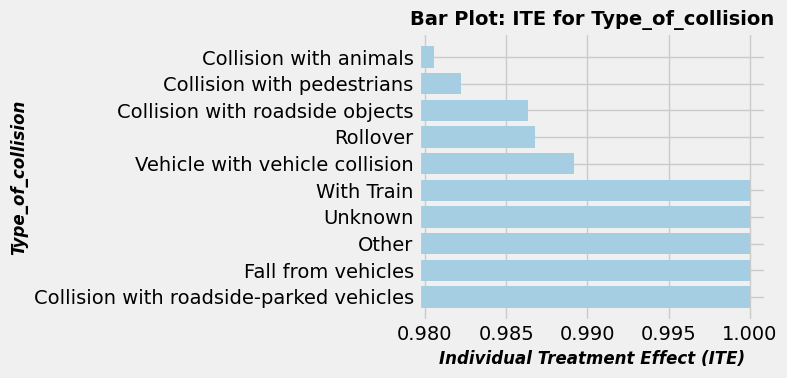

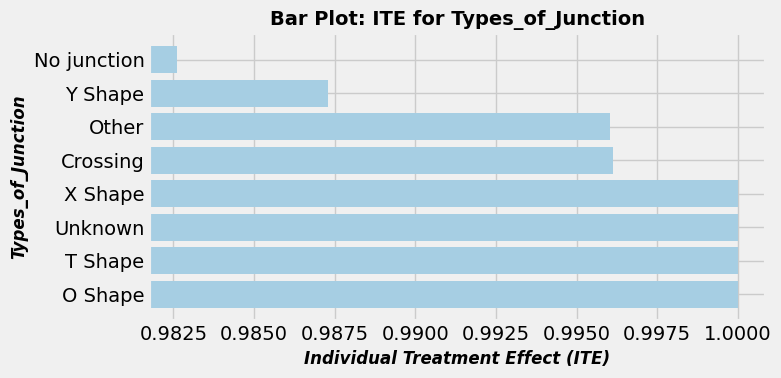

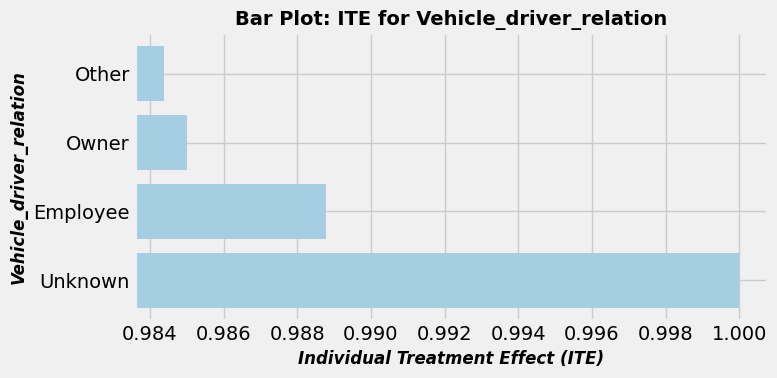

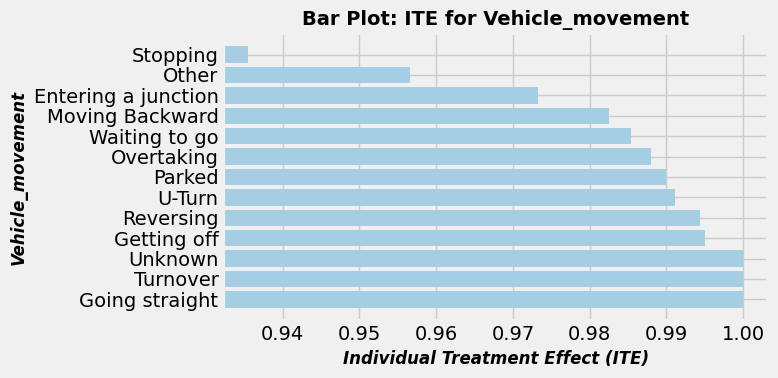

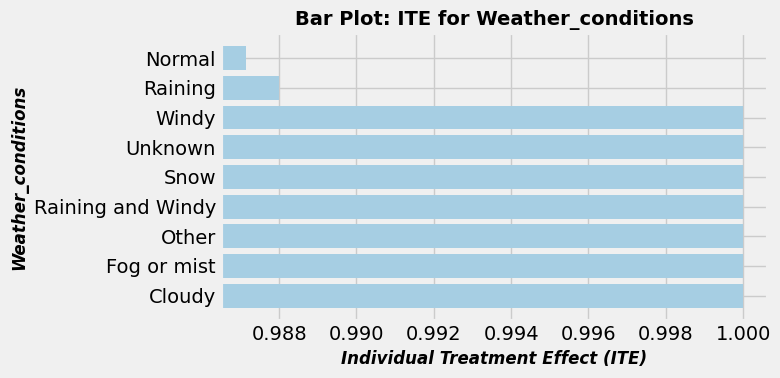

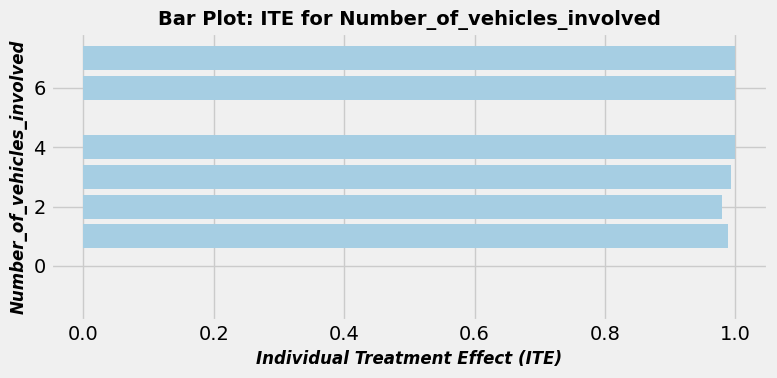

In [ ]:
total_feat = len(calculated_data)

for i in range(0, total_feat):
  visualizeITE(calculated_data[i][0], calculated_data[i][2])
  print()

**SEABORN PLOTS**

In [ ]:
def visualizeITE_plot(feature_name, ite_values, plot_name):
    plt.figure(figsize=(8, 4))

    # Filter out the value ['-1', 0.0] if present
    ite_values_filtered = [item for item in ite_values if item[0] != '-1']

    x = [item[1] for item in ite_values_filtered]
    y = [item[0] for item in ite_values_filtered]

    if plot_name == "line":
        sns.lineplot(x=x, y=y, marker='o', linewidth=2, color='b')
    elif plot_name == "histogram":
        sns.histplot(x, bins='auto', kde=True)
    elif plot_name == "bar":
        sns.barplot(x=x, y=y)
    elif plot_name == "scatter":
        sns.scatterplot(x=x, y=y)
    elif plot_name == "pair":
        sns.pairplot(data=ite_values)
    elif plot_name == "box":
        sns.boxplot(x=x, y=y)
    elif plot_name == "factor":
        sns.factorplot(x=x, y=y, data=ite_values)
    elif plot_name == "car":
        sns.catplot(x=x, y=y, data=ite_values, kind="box")

    plt.xlabel('Individual Treatment Effect (ITE)', fontsize=12, fontweight='bold', fontstyle='italic')
    plt.ylabel(feature_name, fontsize=12, fontweight='bold', fontstyle='italic')
    plt.title(plot_name + ' Plot: ITE for ' + feature_name, fontsize=14, fontweight='bold')

    # Calculate dynamic y-range based on ITE values
    min_ite = min(y)
    max_ite = max(y)
    range_padding = 0.05 * (max_ite - min_ite)
    custom_ylim = (min_ite - range_padding, max_ite + range_padding)
    plt.ylim(custom_ylim)

    plt.tight_layout()
    plt.show()

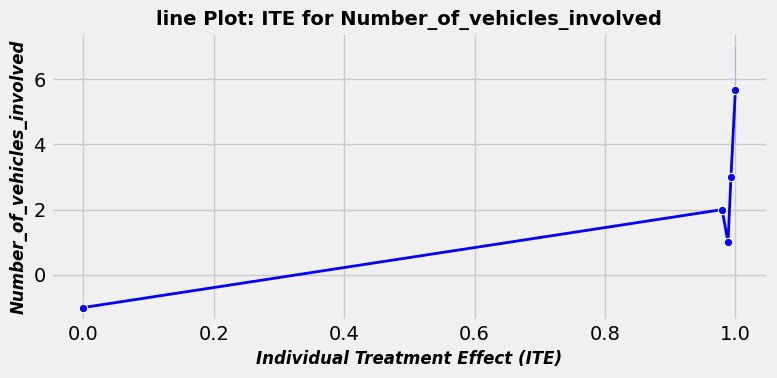

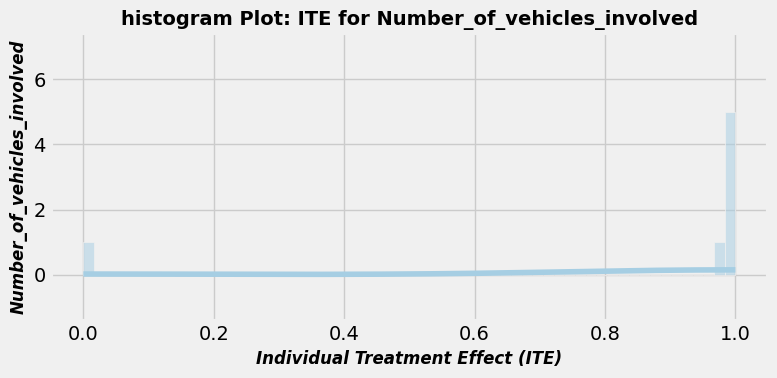

In [ ]:
types = ['line',
         'histogram',
         'bar',
         'scatter',
         'pair',
         'box',
         'factor',
         'car']

for t in types:
  visualizeITE_plot(calculated_data[i][0], calculated_data[i][2],t)
  print()